In [1]:
from pathlib import Path
from datetime import date , datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore")

# Lectura y procesamiento de los datos

Luego de procesar estos datos se creará un df que contenga el compilado de todos los datos oficiales y blind test en el númeral 
- Tabla de datos oficiales
- Tabla de datos blind

In [2]:
#Se quiere que este código perdure en el tiempo, por tanto, se genera el código para que lea todos los excel  hasta el año actual
today = date.today()
#Los datos de producción se obtienen desde el año 2013
primeraño=2013
añoactual=today.year
#Un rango de fechas desde el 2013 hasta el año actual
años = range(primeraño,añoactual+1,1)
#Se crea una función para leer los nombres de los archivos que estan ubicados en el directorio
def ls(ruta = Path.cwd()):
    return [arch.name for arch in Path(ruta).iterdir() if arch.is_file()]
#Se establece como ruta una carpeta llamada "Datos" dentro del directorio actual
files=ls("Datos/")
for año in años:
    for file in files:
        añotemp = file[file.find('2'):file.find('2')+4]
        if int(año) == int(añotemp):
            #Se leen los documentos de excel que están en el directorio especificado. Se limita las columnas de la A a la Q
            globals()["año" + str(año)] = pd.read_excel('Datos/'+file,usecols='A:Q')
            #Se eliminan las filas con valores nulos, para así quitar encabezados y totalizadores
            globals()["año" + str(año)]=globals()["año" + str(año)].dropna().reset_index(drop=True)
            #La primera fila pasa a ser el encabezado del data frame
            globals()["año" + str(año)]=globals()["año" + str(año)].rename(columns= globals()["año" + str(año)].iloc[0]).drop(0)
#Dando formato al encabezado
años=[año2013,año2014,año2015,año2016,año2017,año2018,año2019,año2020]
for año in años:
    año.columns = año.columns.str.upper()
    año.columns = año.columns.str.strip()
#Estandarizamos los encabezados para todas las empresas
año2013 = año2013.rename(columns={'EMPRESA': 'OPERADORA'})
año2014 = año2014.rename(columns={'EMPRESA': 'OPERADORA'})
#Eliminando la columna que solo aparece en los años 2013 - 2014
año2013.drop(columns=['CUENCA'],inplace=True)
año2014.drop(columns=['CUENCA'],inplace=True)

# Datos oficiales

# 1

In [3]:
#Hago una lista con los nombres de las columnas del dataframe
column2020=año2020.columns
#hallo la posición de la columna que contiene a Enero
for col in range(0,len(column2020)):
    if column2020[col].lower() == 'enero':
        j=col
#Paso de formato wide a long sabiendo cual es la columna que contiene a enero, lugar desde el cual queremos hacer el pivote
table2020 = pd.melt(año2020, id_vars=column2020[0:j], var_name="MES", value_name="ACEITE")
#Agrupo por campo
campo2020 = pd.pivot_table(table2020, values='ACEITE', index=['CAMPO'], aggfunc=np.sum).sort_values(by='ACEITE', ascending=False, na_position='first')
#Al agrupar también ordené de mayor a menor, por tanto el top 5 es igual a las primeras 5 filas
top2020campos=campo2020[0:5]

In [4]:
campo2020

,ACEITE
CAMPO,
RUBIALES,857001.07
CASTILLA,537068.14
CHICHIMENE,388023.81
CASTILLA NORTE,380005.77
QUIFA,304783.67
...,...
CERRO GORDO,0.48
MARSUPIAL,0.32
MERECUMBE,0.26


In [5]:
top2020campos

,ACEITE
CAMPO,
RUBIALES,857001.07
CASTILLA,537068.14
CHICHIMENE,388023.81
CASTILLA NORTE,380005.77
QUIFA,304783.67


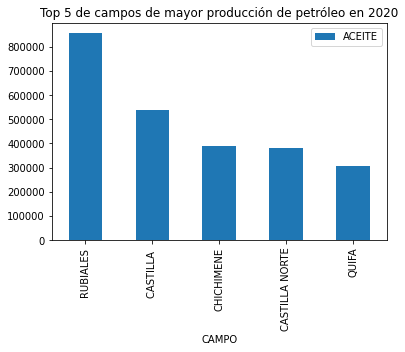

In [6]:
plot = top2020campos.plot(kind='bar', title='Top 5 de campos de mayor producción de petróleo en 2020')

# 2

In [7]:
#Hago una lista con los nombres de las columnas del dataframe
column2018=año2018.columns
#hallo la posición de la columna que contiene a Enero
for col in range(0,len(column2018)):
    if column2018[col].lower() == 'enero':
        j=col
table2018 = pd.melt(año2018, id_vars=column2018[0:j], var_name="MES", value_name="ACEITE")
campo2018 = pd.pivot_table(table2018, values='ACEITE', index=['DEPARTAMENTO','OPERADORA','CAMPO'], aggfunc=np.sum).sort_values(by='ACEITE', ascending=False, na_position='first').reset_index(level='DEPARTAMENTO')
campo2018=campo2018[campo2018['ACEITE']!= 0]
campo2018cas= campo2018[campo2018['DEPARTAMENTO']=='CASANARE'].drop('DEPARTAMENTO',axis=1).reset_index()


In [8]:
campo2018cascount=campo2018cas['OPERADORA'].value_counts().to_frame()
campo2018cascount=campo2018cascount[campo2018cascount['OPERADORA']>=5]
campo2018cascount

,OPERADORA
Frontera Energy Colombia Corp Sucursal Colombia,34
PERENCO COLOMBIA LIMITED,34
GEOPARK COLOMBIA S.A.S.,20
ECOPETROL S.A.,9
PAREX RESOURCES COLOMBIA LTD. SUCURSAL,7
COLOMBIA ENERGY DEVELOPMENT CO,6
NEW GRANADA ENERGY CORPORATION SUCURSAL COLOMBIA,6
CEPSA COLOMBIA S.A.,6
LEWIS ENERGY COLOMBIA INC,5
CARRAO ENERGY S.A. SUCURSAL COLOMIBA,5


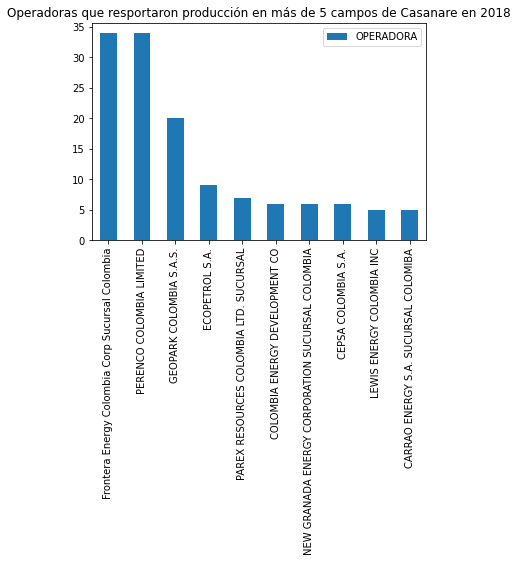

In [9]:
plot = campo2018cascount.plot(kind='bar', title='Operadoras que resportaron producción en más de 5 campos de Casanare en 2018')

# 3

In [10]:
contrato2018 = pd.pivot_table(table2018, values='ACEITE', index=['CONTRATO'], aggfunc=np.sum).sort_values(by='ACEITE', ascending=False, na_position='first')
top2018contratos=contrato2018[0:5]/1000000

In [11]:
top2018contratos

,ACEITE
CONTRATO,
CUBARRAL,2.177189
RUBIALES,1.433612
LLA 34,0.725580
QUIFA,0.554438
LA CIRA INFANTAS,0.542415


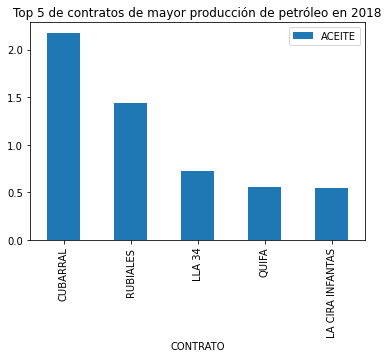

In [12]:
plot = top2018contratos.plot(kind='bar', title='Top 5 de contratos de mayor producción de petróleo en 2018')

# 4

In [13]:
column2019=año2019.columns

for col in range(0,len(column2019)):
    if column2018[col].lower() == 'enero':
        j=col
table2019 = pd.melt(año2019, id_vars=column2019[0:j], var_name="MES", value_name="ACEITE")
operadora2019 = pd.pivot_table(table2019, values='ACEITE', index=['OPERADORA','MES'], aggfunc=np.sum).sort_values(by='ACEITE', ascending=False, na_position='first').reset_index(level='MES')
operadora2019ago=operadora2019[operadora2019['MES']=='AGOSTO'].sort_values(by='ACEITE', ascending=False, na_position='first').drop('MES',axis=1)
topoperadora2019ago=operadora2019ago[0:10]

In [14]:
operadora2019

,MES,ACEITE
OPERADORA,,
ECOPETROL S.A.,DICIEMBRE,484942.87
ECOPETROL S.A.,ENERO,481671.46
ECOPETROL S.A.,JUNIO,481050.47
ECOPETROL S.A.,FEBRERO,480734.78
ECOPETROL S.A.,MAYO,478635.43
...,...,...
INVEPETROL LIMITED COLOMBIA,ABRIL,0.00
TPL COLOMBIA LTD - SUCURSAL COLOMBIA ANTES PANATLANTIC COLOMBIA LTD SUCURSAL EN COLOMBIA,FEBRERO,0.00
PETROLEOS COLOMBIANOS SA,MARZO,0.00


In [15]:
topoperadora2019ago

,ACEITE
OPERADORA,
ECOPETROL S.A.,473986.41
Frontera Energy Colombia Corp Sucursal Colombia,81441.68
GEOPARK COLOMBIA S.A.S.,69154.42
OCCIDENTAL DE COLOMBIA LLC,53299.12
EQUION ENERGÍA LIMITED,34950.01
GRAN TIERRA ENERGY COLOMBIA LTD,29555.20
MANSAROVAR ENERGY COLOMBIA LTD,25256.75
HOCOL S.A.,19614.02
PAREX RESOURCES COLOMBIA LTD. SUCURSAL,15727.97


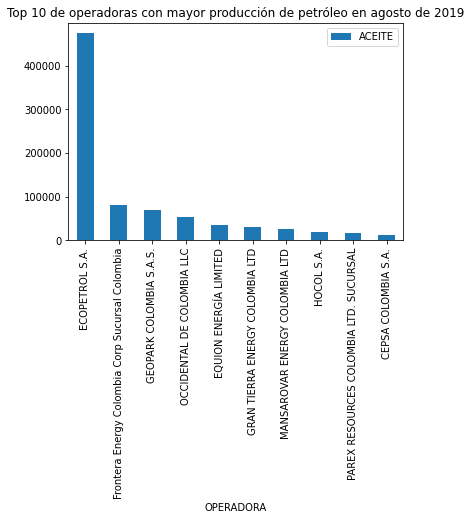

In [16]:
plot = topoperadora2019ago.plot(kind='bar', title='Top 10 de operadoras con mayor producción de petróleo en agosto de 2019')

# 5

In [17]:
#Lista para realizar el filtro
T1=['enero','febrero','marzo']
T2=['abril','mayo','junio']

In [18]:
#Agrupo por mes
meses2019 = pd.pivot_table(table2019, values='ACEITE', index=['MES'], aggfunc=np.sum).sort_values(by='ACEITE', ascending=False, na_position='first').reset_index(level='MES')
#Aplico formato al texto para realizar el filtro correctamente 
meses2019['MES']=meses2019['MES'].apply(lambda x: x.lower())
#Aplico los filtros de los trimestres y guardo los resultados
T12019=meses2019[meses2019['MES'].isin(T1)].reset_index(drop=True)
T22019=meses2019[meses2019['MES'].isin(T2)].reset_index(drop=True)
#Agrupo por mes
meses2020 = pd.pivot_table(table2020, values='ACEITE', index=['MES'], aggfunc=np.sum).sort_values(by='ACEITE', ascending=False, na_position='first').reset_index(level='MES')
#Aplico formato al texto para realizar el filtro correctamente 
meses2020['MES']=meses2020['MES'].apply(lambda x: x.lower())
#Aplico los filtros de los trimestres y guardo los resultados
T12020=meses2020[meses2020['MES'].isin(T1)].reset_index(drop=True)
T22020=meses2020[meses2020['MES'].isin(T2)].reset_index(drop=True)

In [19]:
#Genero un data frame para guardas los resultados de los filtros y agrupaciones
trim1920 = pd.DataFrame({"Año": [2019,2020], "Trimestre 1": [T12019['ACEITE'].sum(),T12020['ACEITE'].sum()], "Trimestre 2": [T22019['ACEITE'].sum(),T22020['ACEITE'].sum()]})
#Subo a indice la columna año
trim1920.set_index("Año")

,Trimestre 1,Trimestre 2
Año,,
2019,2676538.43,2.677717e+06
2020,2619416.71,2.258345e+06


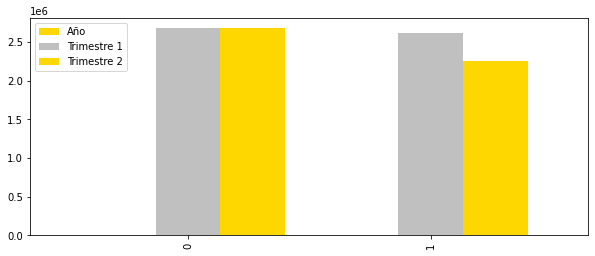

In [20]:
coloresMedallas = ['#FFD700','#C0C0C0']

trim1920.plot(kind = 'bar',
             width=0.8,
             figsize=(10,4),
             color = coloresMedallas);

# Tabla de datos oficiales

In [21]:
#Generando las tablas no usadas en los puntos anteriores
#Hago una lista con los nombres de las columnas del dataframe
column2013=año2013.columns
column2014=año2014.columns
column2015=año2015.columns
column2016=año2016.columns
column2017=año2017.columns
#hallo la posición de la columna que contiene a Enero
for col in range(0,len(column2013)):
    if column2013[col].lower() == 'enero':
        j=col
#Paso de formato wide a long sabiendo cual es la columna que contiene a enero, lugar desde el cual queremos hacer el pivote
table2013 = pd.melt(año2013, id_vars=column2013[0:j], var_name="MES", value_name="ACEITE")
for col in range(0,len(column2014)):
    if column2014[col].lower() == 'enero':
        j=col
table2014 = pd.melt(año2014, id_vars=column2014[0:j], var_name="MES", value_name="ACEITE")
for col in range(0,len(column2015)):
    if column2015[col].lower() == 'enero':
        j=col
table2015 = pd.melt(año2015, id_vars=column2015[0:j], var_name="MES", value_name="ACEITE")
for col in range(0,len(column2016)):
    if column2016[col].lower() == 'enero':
        j=col
table2016 = pd.melt(año2015, id_vars=column2016[0:j], var_name="MES", value_name="ACEITE")
for col in range(0,len(column2017)):
    if column2017[col].lower() == 'enero':
        j=col
table2017 = pd.melt(año2017, id_vars=column2017[0:j], var_name="MES", value_name="ACEITE")

In [22]:
#Juntaré los 3 años en un data frame, para esto, voy a diferenciarlos por el año
table2013['YYYY'] = 2013
table2014['YYYY'] = 2014
table2015['YYYY'] = 2015
table2016['YYYY'] = 2016
table2017['YYYY'] = 2017
table2018['YYYY'] = 2018
table2019['YYYY'] = 2019
table2020['YYYY'] = 2020

In [23]:
#Ahora convertiré el mes a número para tener datos secuenciales MM-YYYY
def mesnum(mes):
    if mes.lower().strip() == 'enero':
        mesn = 1 
    if mes.lower().strip() == 'febrero':
        mesn = 2 
    if mes.lower().strip() == 'marzo':
        mesn = 3
    if mes.lower().strip() == 'abril':
        mesn = 4 
    if mes.lower().strip() == 'mayo':
        mesn = 5 
    if mes.lower().strip() == 'junio':
        mesn = 6
    if mes.lower().strip() == 'julio':
        mesn = 7 
    if mes.lower().strip() == 'agosto':
        mesn = 8 
    if mes.lower().strip() == 'septiembre':
        mesn = 9
    if mes.lower().strip() == 'octubre':
        mesn = 10 
    if mes.lower().strip() == 'noviembre':
        mesn = 11
    if mes.lower().strip() == 'diciembre':
        mesn = 12
    return mesn

table2013['MM'] = table2013['MES'].apply(mesnum)
table2014['MM'] = table2014['MES'].apply(mesnum)
table2015['MM'] = table2015['MES'].apply(mesnum)
table2016['MM'] = table2016['MES'].apply(mesnum)
table2017['MM'] = table2017['MES'].apply(mesnum)
table2018['MM'] = table2018['MES'].apply(mesnum)
table2019['MM'] = table2019['MES'].apply(mesnum)
table2020['MM'] = table2020['MES'].apply(mesnum)

#Concateno el mes y el año
def concat(*args):
    strs = [str(arg) for arg in args if not pd.isnull(arg)]
    return '/'.join(strs) if strs else np.nan
np_concat = np.vectorize(concat)

table2013['MM-YYYY'] = np_concat(table2013['MM'], table2013['YYYY'])
table2014['MM-YYYY'] = np_concat(table2014['MM'], table2014['YYYY'])
table2015['MM-YYYY'] = np_concat(table2015['MM'], table2015['YYYY'])
table2016['MM-YYYY'] = np_concat(table2016['MM'], table2016['YYYY'])
table2017['MM-YYYY'] = np_concat(table2017['MM'], table2017['YYYY'])
table2018['MM-YYYY'] = np_concat(table2018['MM'], table2018['YYYY'])
table2019['MM-YYYY'] = np_concat(table2019['MM'], table2019['YYYY'])
table2020['MM-YYYY'] = np_concat(table2020['MM'], table2020['YYYY'])

#Realizo formato de fecha
table2013['FECHA'] = table2013['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2014['FECHA'] = table2014['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2015['FECHA'] = table2015['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2016['FECHA'] = table2016['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2017['FECHA'] = table2017['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2018['FECHA'] = table2018['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2019['FECHA'] = table2019['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
table2020['FECHA'] = table2020['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))

#Borraré las columnas que creé para genera la fecha
table2013.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)
table2014.drop(['MM','MM-YYYY'], axis = 'columns', inplace=True)
table2015.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)
table2016.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)
table2017.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)
table2018.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)
table2019.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)
table2020.drop([ 'MM','MM-YYYY'], axis = 'columns', inplace=True)

#Dejamos todos los años en un solo df
table_comp= pd.concat([table2013,table2014,table2015,table2016,table2017,table2018,table2019,table2020], ignore_index=True).fillna("No encontrado")

In [55]:
table2016['ACEITE'].sum()

12070043.560726535

# Blind data

El script de lectura es el mismo que el usado para los datos oficiales, solo cambia el directorio de trabajo

In [25]:
#Se quiere que este código perdure en el tiempo, por tanto, se genera el código para que lea todos los excel  hasta el año actual
today = date.today()
#Los datos de producción se obtienen desde el año 2013
primeraño=2013
añoactual=today.year
#Un rango de fechas desde el 2013 hasta el año actual
años = range(primeraño,añoactual+1,1)
#Se crea una función para leer los nombres de los archivos que estan ubicados en el directorio
def ls(ruta = Path.cwd()):
    return [arch.name for arch in Path(ruta).iterdir() if arch.is_file()]
#Se establece como ruta una carpeta llamada "Datos/Blind data/" dentro del directorio actual
files=ls("Datos/Blind data/")
for año in años:
    for file in files:
        añotemp = file[file.find('2'):file.find('2')+4]
        if int(año) == int(añotemp):
            #Se leen los documentos de excel que están en el directorio especificado. Se limita las columnas de la A a la Q
            globals()["blindaño" + str(año)] = pd.read_excel('Datos/Blind data/'+file,usecols='A:Q')
            #Se eliminan las filas con valores nulos, para así quitar encabezados y totalizadores
            globals()["blindaño" + str(año)]=globals()["blindaño" + str(año)].dropna().reset_index(drop=True)

# 6

In [26]:
#Hago una lista con los nombres de las columnas del dataframe
blind_column2019=blindaño2019.columns
#hallo la posición de la columna que contiene a Enero
for col in range(0,len(blind_column2019)):
    if blind_column2019[col].lower() == 'enero':
        j=col
#Paso de formato wide a long sabiendo cual es la columna que contiene a enero, lugar desde el cual queremos hacer el pivote
blind_table2019 = pd.melt(blindaño2019, id_vars=blind_column2019[0:j], var_name="MES", value_name="ACEITE")

In [27]:
#Si se desea inspeccionar otro campo y otro mes, solo debe cambiar estas variables
campo='1f d2689f'
mes='JULIO'

In [28]:
campo2019_7 = blind_table2019[blind_table2019['CAMPO']==campo.lower()][blind_table2019['MES']==mes.upper()].reset_index(drop=True)
print('Caudal de producción del campo', campo.upper(), 'en Julio de 2019:',campo2019_7['ACEITE'][0])

Caudal de producción del campo 1F D2689F en Julio de 2019: 4766.241346484784


In [29]:
blind_table2019[blind_table2019['CAMPO']==campo.lower()]

,DEPARTAMENTO,MUNICIPIO,OPERADORA,CONTRATO,CAMPO,MES,ACEITE
0,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,ENERO,7897.993261
46,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,FEBRERO,6687.201142
92,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,MARZO,6176.648164
138,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,ABRIL,5998.336864
184,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,MAYO,5838.969170
230,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,JUNIO,6390.660871
276,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,JULIO,4766.241346
322,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,AGOSTO,5871.527810
368,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,SEPTIEMBRE,5179.292397
414,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,OCTUBRE,5928.184630


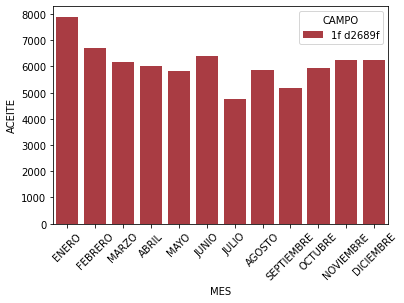

In [30]:
by_field=sns.barplot(x='MES', y='ACEITE', hue='CAMPO', data=blind_table2019[blind_table2019['CAMPO']==campo.lower()], palette=sns.color_palette("RdBu", n_colors=7))
for item in by_field.get_xticklabels():
    item.set_rotation(45)

# 7

In [31]:
#Si se desea inspeccionar otro campo y otro mes, solo debe cambiar estas variables
operadora = '2fe52430'
mes = 'FEBRERO'

In [32]:
operadora2019_2 = blind_table2019[blind_table2019['OPERADORA']==operadora.lower()][blind_table2019['MES']==mes.upper()].reset_index(drop=True)
print('Caudal de producción de la operadora', operadora.upper(), 'en Febrero de 2019:',operadora2019_2['ACEITE'].sum())

Caudal de producción de la operadora 2FE52430 en Febrero de 2019: 7452.2204502174945


In [33]:
blind_table2019[blind_table2019['OPERADORA']==operadora.lower()][blind_table2019['MES']==mes.upper()]

,DEPARTAMENTO,MUNICIPIO,OPERADORA,CONTRATO,CAMPO,MES,ACEITE
74,f7fd2c4f,16b873c5,2fe52430,23980b82,7eb34927,FEBRERO,88.628230
75,f7fd2c4f,16b873c5,2fe52430,23980b82,4f4a249f,FEBRERO,141.326684
76,f7fd2c4f,16b873c5,2fe52430,23980b82,8ba362f3,FEBRERO,477.124368
86,0fa93c9b,756c486f,2fe52430,4b05ae15,48670499,FEBRERO,5605.229884
87,0fa93c9b,756c486f,2fe52430,4b05ae15,373ebdec,FEBRERO,572.625364
88,0fa93c9b,756c486f,2fe52430,4b05ae15,e32e23a1,FEBRERO,567.285920


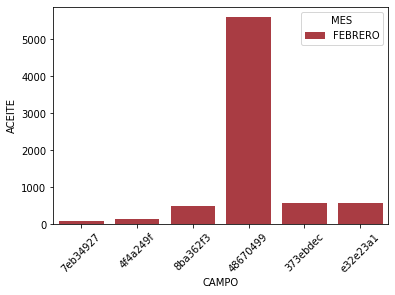

In [34]:
by_field=sns.barplot(x='CAMPO', y='ACEITE', hue='MES', data=blind_table2019[blind_table2019['OPERADORA']==operadora.lower()][blind_table2019['MES']==mes.upper()], palette=sns.color_palette("RdBu", n_colors=7))
for item in by_field.get_xticklabels():
    item.set_rotation(45)

# 8

In [35]:
#Hago una lista con los nombres de las columnas del dataframe
blind_column2018=blindaño2018.columns
#hallo la posición de la columna que contiene a Enero
for col in range(0,len(blind_column2018)):
    if blind_column2018[col].lower() == 'enero':
        j=col
#Paso de formato wide a long sabiendo cual es la columna que contiene a enero, lugar desde el cual queremos hacer el pivote
blind_table2018 = pd.melt(blindaño2018, id_vars=blind_column2018[0:j], var_name="MES", value_name="ACEITE")

In [36]:
#Agrupo por departamento
departamento2018 = pd.pivot_table(blind_table2018, values='ACEITE', index=['DEPARTAMENTO'], aggfunc=np.sum).sort_values(by='ACEITE', na_position='first').reset_index()

In [37]:
departamento2018

,DEPARTAMENTO,ACEITE
0,0fa93c9b,98767.669386
1,f7fd2c4f,126069.165338
2,cf33cb8a,623608.432526


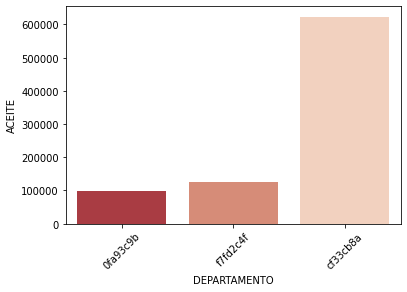

In [38]:
by_field=sns.barplot(x='DEPARTAMENTO', y='ACEITE', data=departamento2018, palette=sns.color_palette("RdBu", n_colors=7))
for item in by_field.get_xticklabels():
    item.set_rotation(45)

# 9

In [39]:
#Hago una lista con los nombres de las columnas del dataframe
blind_column2017=blindaño2017.columns
#hallo la posición de la columna que contiene a Enero
for col in range(0,len(blind_column2017)):
    if blind_column2017[col].lower() == 'enero':
        j=col
#Paso de formato wide a long sabiendo cual es la columna que contiene a enero, lugar desde el cual queremos hacer el pivote
blind_table2017 = pd.melt(blindaño2017, id_vars=blind_column2017[0:j], var_name="MES", value_name="ACEITE")

# Tabla de datos blind

In [40]:
#Juntaré los 3 años en un data frame, para esto, voy a diferenciarlos por el año
blind_table2017['YYYY'] = 2017
blind_table2018['YYYY'] = 2018
blind_table2019['YYYY'] = 2019

In [41]:
#Ahora convertiré el mes a número para tener datos secuenciales MM-YYYY
def mesnum(mes):
    if mes.lower() == 'enero':
        mesn = 1 
    if mes.lower() == 'febrero':
        mesn = 2 
    if mes.lower() == 'marzo':
        mesn = 3
    if mes.lower() == 'abril':
        mesn = 4 
    if mes.lower() == 'mayo':
        mesn = 5 
    if mes.lower() == 'junio':
        mesn = 6
    if mes.lower() == 'julio':
        mesn = 7 
    if mes.lower() == 'agosto':
        mesn = 8 
    if mes.lower() == 'septiembre':
        mesn = 9
    if mes.lower() == 'octubre':
        mesn = 10 
    if mes.lower() == 'noviembre':
        mesn = 11
    if mes.lower() == 'diciembre':
        mesn = 12
    return mesn

blind_table2017['MM'] = blind_table2017['MES'].apply(mesnum)
blind_table2018['MM'] = blind_table2018['MES'].apply(mesnum)
blind_table2019['MM'] = blind_table2019['MES'].apply(mesnum)

#Concateno el mes y el año
def concat(*args):
    strs = [str(arg) for arg in args if not pd.isnull(arg)]
    return '/'.join(strs) if strs else np.nan
np_concat = np.vectorize(concat)
 
blind_table2017['MM-YYYY'] = np_concat(blind_table2017['MM'], blind_table2017['YYYY'])
blind_table2018['MM-YYYY'] = np_concat(blind_table2018['MM'], blind_table2018['YYYY'])
blind_table2019['MM-YYYY'] = np_concat(blind_table2019['MM'], blind_table2019['YYYY'])

#Realizo formato de fecha
blind_table2017['FECHA'] = blind_table2017['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
blind_table2018['FECHA'] = blind_table2018['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
blind_table2019['FECHA'] = blind_table2019['MM-YYYY'].apply(lambda x: datetime.strptime(x, '%m/%Y'))

#Borraré las columnas que creé para genera la fecha excepto año, la cual usaré para solucionar este punto
blind_table2017.drop(['MES','MM','MM-YYYY'], axis = 'columns', inplace=True)
blind_table2018.drop(['MES','MM','MM-YYYY'], axis = 'columns', inplace=True)
blind_table2019.drop(['MES','MM','MM-YYYY'], axis = 'columns', inplace=True)

#Dejamos todos los años en un solo df
blind_table_comp= pd.concat([blind_table2017, blind_table2018, blind_table2019], ignore_index=True)

In [42]:
blind_table_comp

,DEPARTAMENTO,MUNICIPIO,OPERADORA,CONTRATO,CAMPO,ACEITE,YYYY,FECHA
0,cf33cb8a,cf33cb8a,d5580f74,76a16657,1f d2689f,12371.083713,2017,2017-01-01
1,cf33cb8a,cf33cb8a,d5580f74,76a16657,9ac1420f,5.367156,2017,2017-01-01
2,cf33cb8a,cf33cb8a,d5580f74,76a16657,9b395bc9,120.462831,2017,2017-01-01
3,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,2f614c0b,23208.879752,2017,2017-01-01
4,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,043b305e,4386.088856,2017,2017-01-01
...,...,...,...,...,...,...,...,...
1459,0fa93c9b,756c486f,2fe52430,4b05ae15,373ebdec,1084.287554,2019,2019-12-01
1460,0fa93c9b,756c486f,2fe52430,4b05ae15,e32e23a1,414.497377,2019,2019-12-01
1461,657b6154,a6b36c07,ffd6d24d,38c31ea1,11e586b4,0.000000,2019,2019-12-01
1462,657b6154,a6b36c07,ffd6d24d,38c31ea1,11e586b4,408.016097,2019,2019-12-01


In [43]:
depcampo = pd.pivot_table(blind_table_comp, values='ACEITE', index=['DEPARTAMENTO','CAMPO','YYYY'], aggfunc=np.mean).sort_values(by='ACEITE', ascending=False, na_position='first').reset_index()
depcampo.drop(columns=['CAMPO','YYYY'],inplace=True)

In [44]:
summary_blind_table=depcampo.groupby('DEPARTAMENTO').describe().unstack(1)
print(summary_blind_table)

               DEPARTAMENTO
ACEITE  count  0fa93c9b            9.000000
               5f559ecb            1.000000
               657b6154            2.000000
               cf33cb8a           70.000000
               ec12ad00            3.000000
               eccb9ef1            1.000000
               f7fd2c4f           31.000000
        mean   0fa93c9b         2460.323964
               5f559ecb           14.576681
               657b6154          147.434035
               cf33cb8a         1819.576036
               ec12ad00            5.415088
               eccb9ef1           29.290088
               f7fd2c4f         1056.621413
        std    0fa93c9b         2537.313576
               5f559ecb                 NaN
               657b6154           74.044511
               cf33cb8a         2928.122479
               ec12ad00            8.328458
               eccb9ef1                 NaN
               f7fd2c4f         1219.352958
        min    0fa93c9b          479.041021
    

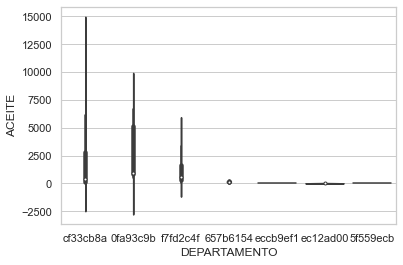

In [45]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="DEPARTAMENTO", y="ACEITE", 
                    data=depcampo, palette="muted")

Según los valores de desviación estandar, y el "violin plot" se observa claramente que el departamento cf33cb8a es el que tiene mayor variación en la producción promedio anual.

# 10

In [46]:
blind_table_comp.drop(['YYYY'], axis = 'columns', inplace=True)

In [47]:
#Grafica de los datos de producción en el tiempo Nota: Se realiza para que pueda ser graficado distintos campos al tiempo
def RegularPlot(df, wells, units):
    fig, ax = plt.subplots(figsize=(15,8))
    plt.xlabel('Fecha')
    plt.ylabel('ACEITE '+ units)
    for well in wells:
        df_filtered = df[df['CAMPO']==well]
        rate = df_filtered['ACEITE']
        date = df_filtered['FECHA']
        ax.plot(date, rate, 'o', label=well)
    ax.legend(shadow=True, fancybox=True)
    return plt
#Se normaliza la grafica anterior con pasos mensuales

def NormalisedData(df, wells):
    norm_data = {}
    for well in wells:
        df_filtered = df[df['CAMPO']==well]
        start_date = min(df_filtered['FECHA'])
        rate = df_filtered['ACEITE']
        time = df_filtered['FECHA'] - start_date
        time = time.dt.days
        norm_data[well] = {
            'rate': rate,
            'time': time
        }
    return norm_data

def NormalisedPlot(df, wells):
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.xlabel('DIAS')
    plt.ylabel('ACEITE')
    for well in wells:
        df_filtered = df[df['CAMPO']==well]
        start_date = min(df_filtered['FECHA'])
        rate = df_filtered['ACEITE']
        time = df_filtered['FECHA'] - start_date
        time = time.dt.days
        ax.plot(time, rate, 'o', label=well)
    ax.legend(shadow=True, fancybox=True)
    return plt

In [48]:
campo = ['51cbb05d']
dfcampo = blind_table_comp.drop(columns=['DEPARTAMENTO','MUNICIPIO','OPERADORA','CONTRATO']).reset_index(drop=True)

In [58]:
dfcampo

,CAMPO,ACEITE,FECHA
0,1f d2689f,12371.083713,2017-01-01
1,9ac1420f,5.367156,2017-01-01
2,9b395bc9,120.462831,2017-01-01
3,2f614c0b,23208.879752,2017-01-01
4,043b305e,4386.088856,2017-01-01
...,...,...,...
1459,373ebdec,1084.287554,2019-12-01
1460,e32e23a1,414.497377,2019-12-01
1461,11e586b4,0.000000,2019-12-01
1462,11e586b4,408.016097,2019-12-01


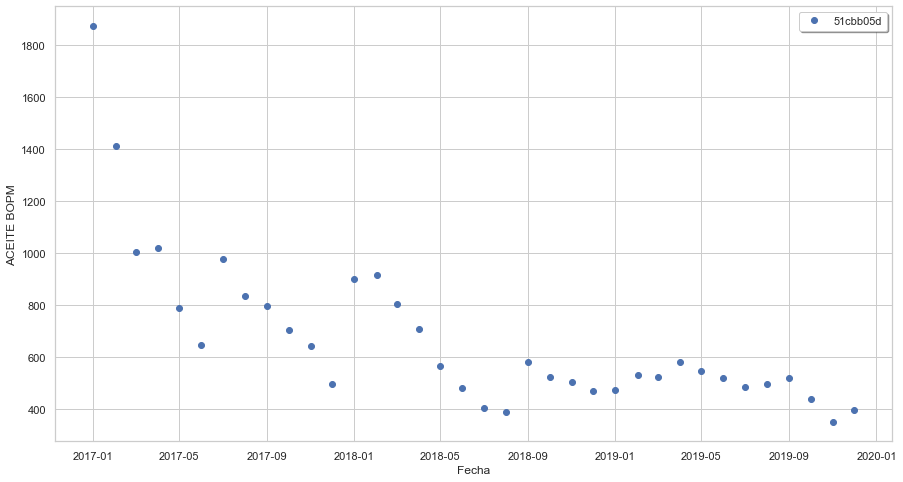

In [49]:
plot_data = RegularPlot (dfcampo, campo, 'BOPM')

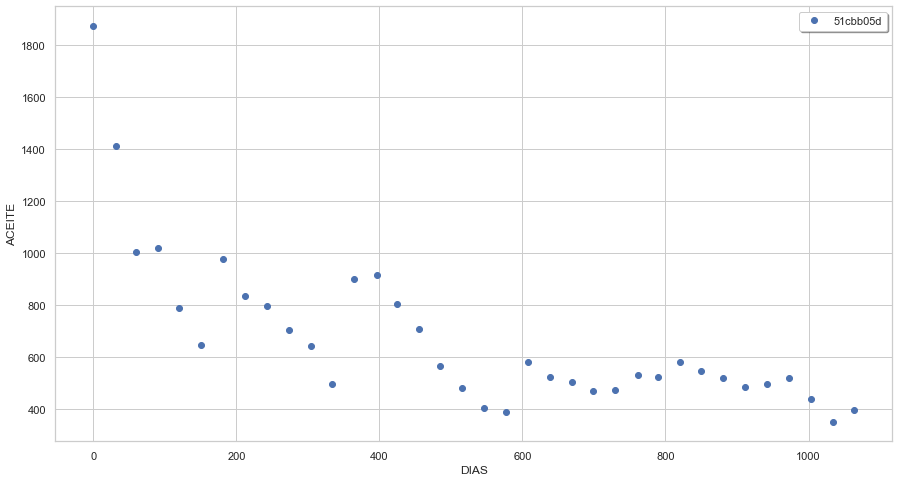

In [50]:
normalised_data = NormalisedData(dfcampo, campo)
normalised_plot = NormalisedPlot(dfcampo, campo)

In [56]:
#Se dejará todo expresado de tal manera que si quiere realizar un tiempo de prueba y otro tiempo de testeo de la ecuación, solo deba cambiar "datat" y quitar el númeral de las dos lineas de código comentada
#Esto se hace ya que es algo común en métodos de machine learning
def arps(t, initial_rate, decline): 
    #Definimos la función de ARPS
    #Declinación hiperbolica con b=0.5
    values = initial_rate / ((1 + 0.5 * decline * t) ** (1 / 0.5))      
    return values
#Haremos un ajuste de una curva a la ecuación de arps con los datos de producción.
#Se harán dos escenarios, tomando como tasa inicial el mayor dato de producción y otra dejando que el ajuste la elija
fitdict1={}
for well in campo:
    #Leemos los datos normalizados de mes y producción
    X_p = normalised_data[well]['time']        
    Y_p = normalised_data[well]['rate']
    X_arps=X_p[:int(len(X_p))]           
    Y_arps=Y_p[:int(len(Y_p))]
    #Se lee la mayor la tasa de producción
    Maxrate=max(Y_arps)   
    #Se realiza un ajuste a la ecuación de Arps 
    fitdict1[well]={
    popt, pcov = curve_fit(arps, X_arps, Y_arps, bounds=([0, 0],[Maxrate, 0.1]))    
      'initial rate': popt[0],
      'decline rate': popt[1] 
    }
datat=0
time_predict=[]
rate_predict=[]
arps_predict={}
for well in campo:
    #Acá es donde se supone que hará un "split data"
    X_p = normalised_data[well]['time']
    time_train=X_p[:int(len(X_p)*datat)]   
    time_predict=X_p[int(len(X_p)*datat):]   
    Y_p = normalised_data[well]['rate']
    rate_test=Y_p[int(len(Y_p)*datat):]
    #Con los parametros ajustados en el ciclo pasado, generamos la curva de ARPS
    for time in time_predict:
        rate_predict=arps(time_predict, fitdict1[well]['initial rate'], fitdict[well]['decline rate'])
        #rate_train=arps(time_train, fitdict[well]['beta'], fitdict[well]['initial rate'], fitdict[well]['decline rate'])
    arps_predict[well]={
        'time':time_predict,
        'rate':rate_predict
    }
    plt.scatter(X_p, Y_p)
    plt.plot(time_predict, rate_predict, color='green', linewidth=3)
    #plt.plot(time_train, rate_train, color='red', linewidth=3)
    plt.xlabel('Days')
    plt.ylabel('Rate')
    plt.title('Arps equation')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-56-1e2ede726099>, line 20)

In [57]:
def arps(t, decline):   #Definimos la función de ARPS
        #Declinación hiperbolica
        #Acá hacemos uso de la tasa que se halló en el método pasado para fijar la tasa inicial
    values = Maxrate / ((1 + 0.5 * decline * t) ** (1 / 0.5))      
    return values

fitdict2={}
for well in campo:
    X_p = normalised_data[well]['time']        
    Y_p = normalised_data[well]['rate']
    X_arps=X_p[:int(len(X_p))]           
    Y_arps=Y_p[:int(len(Y_p))]
                       
    popt, pcov = curve_fit(arps, X_arps, Y_arps, bounds=([0],[0.1]))    #Se realiza un ajuste a la ecuación de Arps usando esos limites y los datos de entrenamiento
    fitdict2[well]={
      
      'decline rate': popt[0] 
    }
datat=0
time_predict=[]
rate_predict=[]
arps_predict={}
for well in campo:
    X_p = normalised_data[well]['time']
    time_train=X_p[:int(len(X_p)*datat)]   
    time_predict=X_p[int(len(X_p)*datat):]    #20% de los datos como prueba
    Y_p = normalised_data[well]['rate']
    rate_test=Y_p[int(len(Y_p)*datat):]
    for time in time_predict:
        rate_predict=arps(time_predict, fitdict2[well]['decline rate'])
        #rate_train=arps(time_train, fitdict[well]['beta'], fitdict[well]['initial rate'], fitdict[well]['decline rate'])
    arps_predict[well]={
        'time':time_predict,
        'rate':rate_predict
    }
    plt.scatter(X_p, Y_p)
    plt.plot(time_predict, rate_predict, color='green', linewidth=3)
    #plt.plot(time_train, rate_train, color='red', linewidth=3)
    plt.xlabel('Days')
    plt.ylabel('Rate')
    plt.title('Arps equation')
    plt.show()

NameError: name 'Maxrate' is not defined

In [ ]:
print('Se dejan dos tasas de declinación para que a consideración del lector elija la que considere correcta')
print('Por el primer método (Tasa inicial variable) se tiene una tasa de declinación de',fitdict1['51cbb05d']['decline rate'])
print('Por el segundo método (Tasa inicial fija) se tiene una tasa de declinación de',fitdict2['51cbb05d']['decline rate'])